In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

The Christoffel symbols calculated symbolically and inserted into the geodesic equation for $\tau$ parametrization (proper time):

# norm: $g_{\mu \nu}u_0^{\mu}u_0^{\nu}=-1$

# $G=1$ ; $c=1$ ; $M=\frac{GM}{c^2}; R_s = \frac{2GM}{c^2}$

# $\frac{d^2 \theta}{d \tau ^2} = -\frac{2}{r} \frac{d\theta}{d \tau} \frac{dr}{d\tau} + sin \theta cos \theta (\frac{d \phi}{d \theta})^2 $

# $\frac{d^2 \phi}{d \tau ^2} = -\frac{2}{r} \frac{d\phi}{d \tau} \frac{dr}{d\tau} - 2ctg \theta \frac{d\phi}{d\tau} \frac{d\theta}{d\tau} $

# $\frac{d^2 t}{d \tau ^2} = -\frac{2M}{r^2(1-\frac{2M}{r})} \frac{dt}{d \tau} \frac{dr}{d\tau} $

# $\frac{d^2r}{d\tau ^2} = -\frac{M}{r^2}(1-\frac{2M}{r})(\frac{dt}{d\tau})^2  - \frac{2M}{r^2(1-\frac{2M}{r})} (\frac{dr}{d\tau})^2 + r(1-\frac{2M}{r})(\frac{d\theta}{d\tau})^2 + (1-\frac{2M}{r})rsin^2(\theta)(\frac{d\phi}{d\tau})^2$


Could be wrong, who knows...

One could do the same for geodesic equation with $t$ parametrization, that is time that is expirienced by an observer sitting at rest at infinity.

In [2]:
def func(y,tau):
    
    t      = y[0]
    dt     = y[1]
    r      = y[2]
    dr     = y[3]  
    phi    = y[4]
    dphi   = y[5]
    theta  = y[6]
    dtheta = y[7]
    
    d2t = -(2*M)/(r**2 * (1-2*M/r)) * dt*dr
    d2r =  -M/(r**2) * (1-2*M/r) * dt**2 - 2*M/(r**2 *(1-2*M/r)) * dr**2 + r*(1-2*M/r)* dtheta**2 + (1-2*M/r)*r*(np.sin(theta))**2 * dphi**2
    d2phi = -2/r * dphi * dr - 2*(np.cos(theta))/(np.sin(theta))*dphi*dtheta
    d2theta = -2/r * dtheta * dr + np.cos(theta)*np.sin(theta) * dphi**2
    
    return [dt,d2t,dr,d2r,dphi,d2phi,dtheta,d2theta]

In [3]:
#light like initial conditions are not the best
G = 1; c = 1; m = 1
M = G * m/(c**2)


t_0 = 0
r_0 = 4
phi_0 = 0
theta_0 = np.pi/2

#vt_0 = 1
vphi_0 = 0.1
vr_0 = 0 
vtheta_0 = 0 


vt_0 = np.sqrt((
    
    - r_0**2 * (np.sin(theta_0)**2) * vphi_0**2 
    - (1 / (1 - 2 * M / r_0)) * vr_0**2 
    - r_0**2 * vtheta_0**2)/ (-(1 - 2 * M / r_0))
) 


tau = np.linspace(0,100000,1000000)
initial = [t_0,vt_0,r_0,vr_0,phi_0,vphi_0,theta_0,vtheta_0]

sol=odeint(func,initial,tau)  

t = sol[:,0]
r = sol[:,2]
phi = sol[:,4]
theta = sol[:,6]

In [4]:
#Time like (massive) initial conditions are okay

G = 1; c = 1; m = 1
M = G * m/(c**2)

t_0 = 0
r_0 = 10
phi_0 = 0
theta_0 = np.pi/2

#vt_0 = 1
vphi_0 = 0.05
vr_0 = 0  
vtheta_0 = 0 


vt_0 = np.sqrt((
    -1 
    - r_0**2 * (np.sin(theta_0)**2) * vphi_0**2 
    - (1 / (1 - 2 * M / r_0)) * vr_0**2 
    - r_0**2 * vtheta_0**2)/ (-(1 - 2 * M / r_0))
) 


tau = np.linspace(0,100000,1000000)
initial = [t_0,vt_0,r_0,vr_0,phi_0,vphi_0,theta_0,vtheta_0]

sol=odeint(func,initial,tau)  

t = sol[:,0]
r = sol[:,2]
phi = sol[:,4]
theta = sol[:,6]

In [5]:
vt_0

np.float64(1.25)

## $g_{\mu \nu}u_0^{\mu}u_0^{\nu}=0$ for lightlike
## $g_{\mu \nu}u_0^{\mu}u_0^{\nu}=-1$ for spacelike

### initial:

In [6]:
(-(1-2*M/r_0))*vt_0**2 + r_0**2 * (np.sin(theta_0))**2*vphi_0**2 + ((1)/(1-2*M/r_0))*vr_0**2 + r_0**2*vtheta_0**2

np.float64(-1.0)

### at all steps:

In [7]:
(-(1-2*M/r))*sol[:,1]**2 + r**2 * (np.sin(theta))**2*sol[:,5]**2 + ((1)/(1-2*M/r))*sol[:,3]**2 + r**2*sol[:,7]**2

array([-1.        , -1.        , -1.        , ..., -1.01621267,
       -1.01621267, -1.01621267])

In [8]:
x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

(-120.0, 120.0)

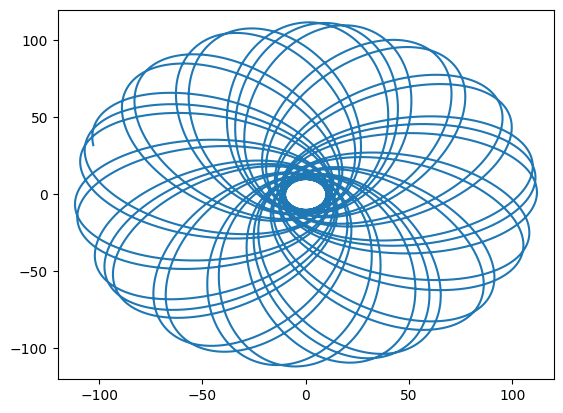

In [9]:
plt.plot(x,y)
plt.xlim(-120,120)
plt.ylim(-120,120)

In [10]:
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
R = 2*G*M/(c**2)
X = R*np.cos(u)*np.sin(v)
Y = R*np.sin(u)*np.sin(v)
Z = R*np.cos(v)

(-40.0, 40.0)

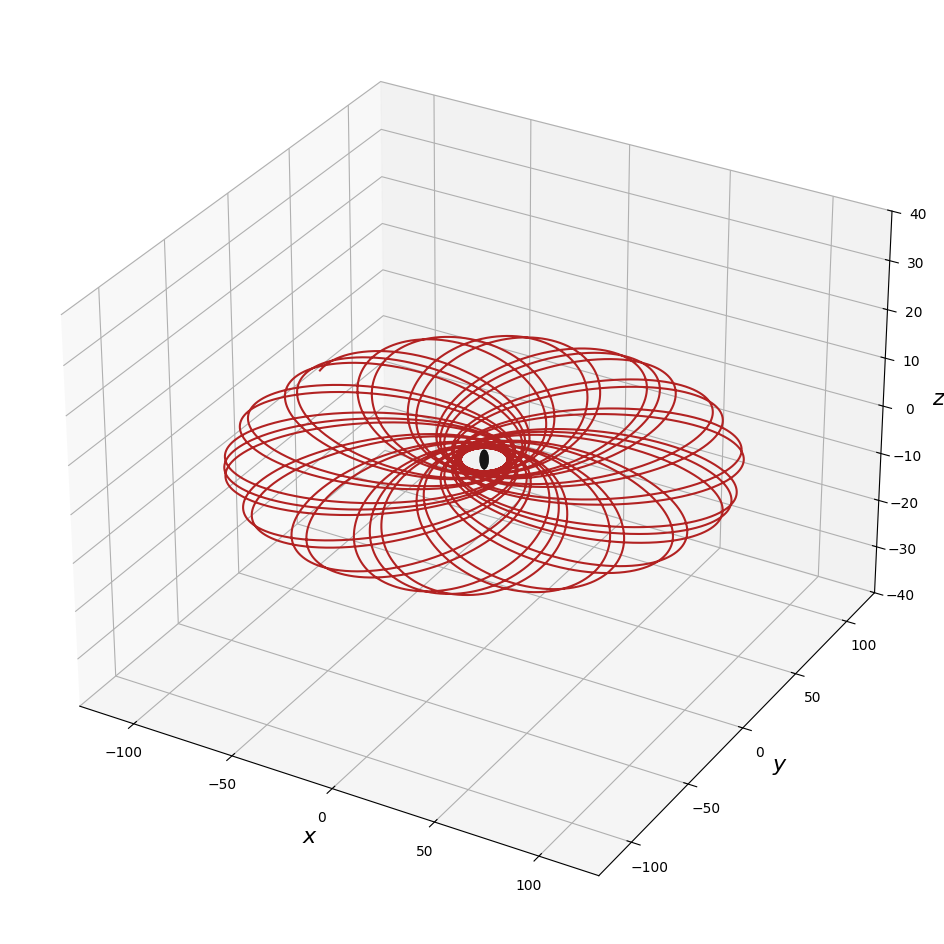

In [11]:
fig10 = plt.figure(10,figsize=(12,12))
ax = fig10.add_subplot(111, projection='3d')
ax.plot3D(x, y, z, color='firebrick',label=r'$m_1$')

ax.plot_surface(X, Y, Z, color="black", alpha=1)

#plt.legend(fontsize=16)
ax.set_xlabel(r'$x$',fontsize=16)
ax.set_ylabel(r'$y$',fontsize=16)
ax.set_zlabel(r'$z$',fontsize=16)

ax.set_zlim(-40,40)

This could all be wrong, but it does look nice :)